In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [106]:
d=pd.read_csv('trainagri.csv')
d

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [107]:
d.shape

(4599, 10)

Observation: 4599 rows and 10 columns in the dataset

In [108]:
d.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [109]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


Observation:Object-ID 
            Float-Number_Weeks_Used               
            Int-Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage  
    

In [110]:
print(d["Crop_Type"].unique())
print(d["Soil_Type"].unique())
print(d["Pesticide_Use_Category"].unique())
print(d["Season"].unique())
print(d["Crop_Damage"].unique())

[1 0]
[0 1]
[1 3 2]
[1 2 3]
[0 1 2]


True


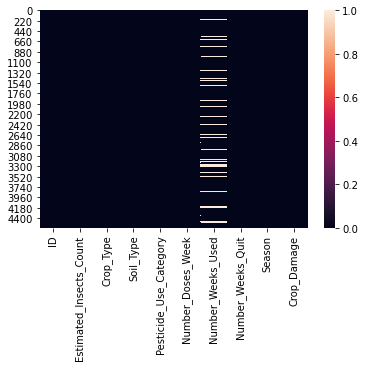

In [111]:
#Check null 
print(d.isnull().values.any())
sns.heatmap(d.isnull())

In [112]:
d.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

Observation:Null values are present Number_Weeks_Used. using Mean method to replace Nan Value.

In [113]:
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(strategy="mean")
d['Number_Weeks_Used']=imp1.fit_transform(d['Number_Weeks_Used'].values.reshape(-1,1))

False


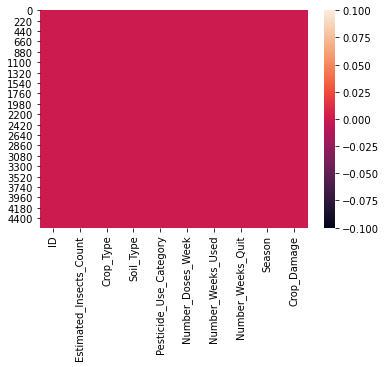

In [114]:
print(d.isnull().values.any())
sns.heatmap(d.isnull())

Observation:No null values are present

In [115]:
d.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observation:Mean is greater than median for Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Quit,Number_Weeks_Used -Data might be right skewed
            Difference between 75 and max is great for Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Quit,Number_Weeks_Used-Outliers may be there
            Estimated_Insects_Count min is 150 and max 4097
        

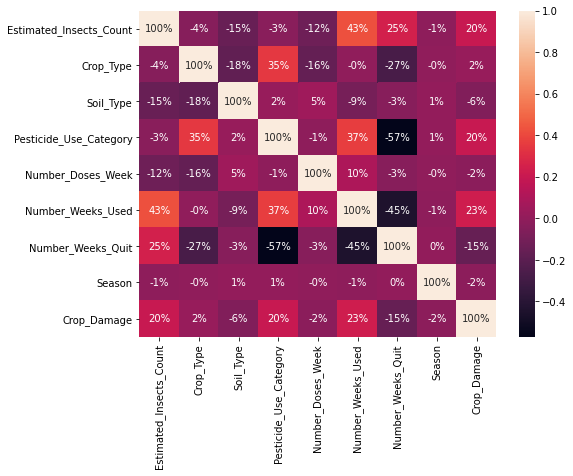

In [116]:
#Correlation 
dfcor=d.corr()
plt.figure(figsize=(8,6))
sns.heatmap(dfcor,annot=True,fmt='.0%')

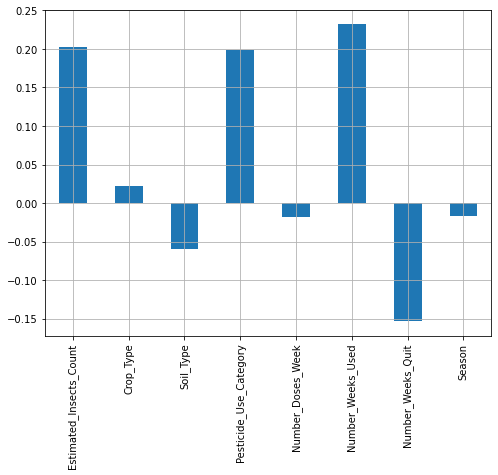

In [117]:
plt.figure(figsize=(8,6))
d.drop('Crop_Damage',axis=1).corrwith(d['Crop_Damage']).plot(kind='bar',grid=True)

Observation:Soil_Type,Number_Doses_Week,Number_Weeks_Quit,Season is negatively corelated
            Estimated_Insects_Count,Pesticide_Use_Category,Number__Week_used is highlt postively corelated

In [118]:
d=d.drop(["ID"],axis=1)

In [119]:
#Correlation
d.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

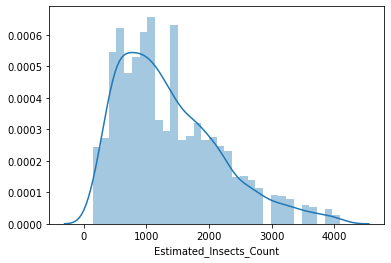

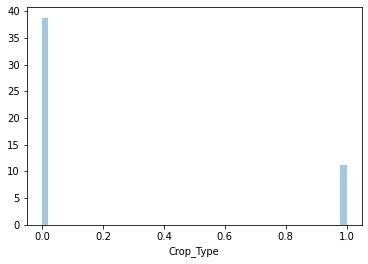

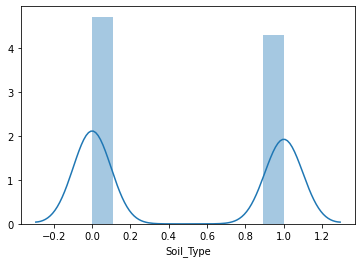

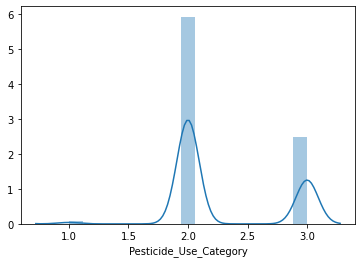

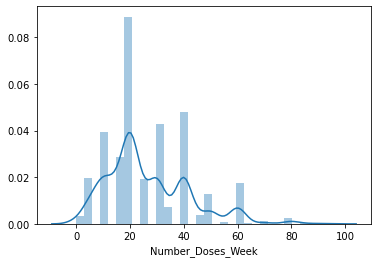

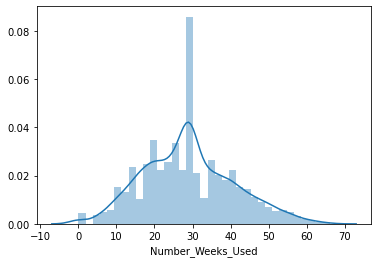

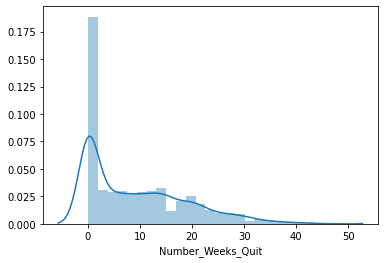

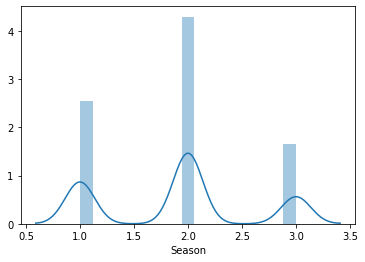

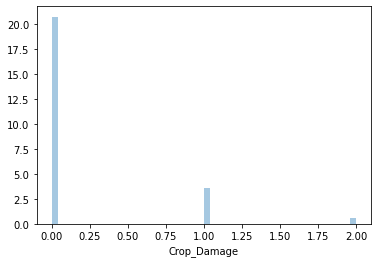

In [120]:
collist=d.columns.values
for i in d.columns:
    sns.distplot(d[i])
    plt.show()

Observation:Data is not skewed, only Crop damage is slighly skewed. No need to remove skewness

Estimated_Insects_Count       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Crop_Type                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Soil_Type                   AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Pesticide_Use_Category     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Number_Doses_Week          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Number_Weeks_Used                AxesSubplot(0.125,0.125;0.133621x0.343182)
Number_Weeks_Quit             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Season                         AxesSubplot(0.44569,0.125;0.133621x0.343182)
Crop_Damage                   AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

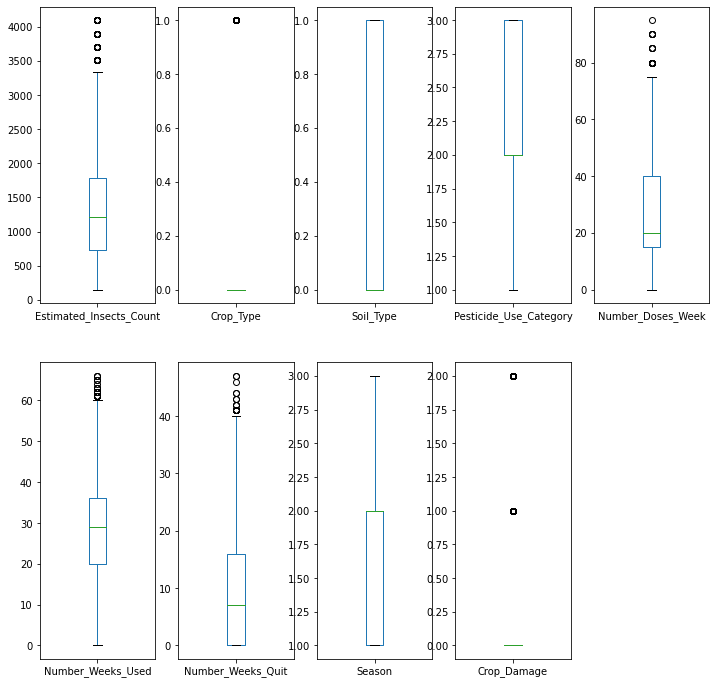

In [121]:
#Outliers
d.plot(kind='box',subplots=True,layout=(2,5),figsize=(12,12))

In [122]:
#Remove outliers
from scipy.stats import zscore
z=np.abs(zscore(d))
threshold=3
print(np.where(z>3))
df_new=d[(z<3).all(axis=1)]
df_new

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.000000,0,1,0
1,209,1,0,1,0,0.000000,0,2,1
2,257,1,0,1,0,0.000000,0,2,1
3,257,1,1,1,0,0.000000,0,2,1
4,342,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.891027,1,1,1
4595,2139,0,1,2,30,47.000000,2,1,1
4596,2267,0,1,2,10,7.000000,27,2,0
4597,2267,0,1,2,10,20.000000,24,2,0


In [137]:
print(d.shape) #dataset
print(df_new.shape) #Removed Outliers

(4599, 9)
(4370, 9)


Analysis

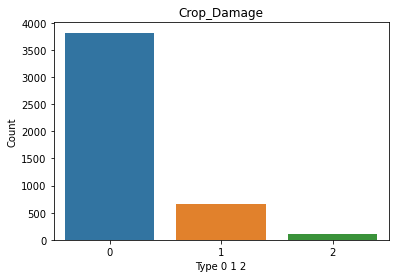

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [123]:
plt.subplots(figsize=(6,4))
sns.countplot(x="Crop_Damage",data=d)
plt.title("Crop_Damage")
plt.xlabel("Type 0 1 2")
plt.ylabel("Count")
plt.show()
print(df.Crop_Damage.value_counts())


Observation:
0 type crop damage -3820
1 type crop damage -664
2 type crop damage -115

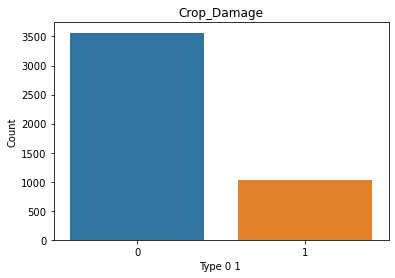

0    3565
1    1034
Name: Crop_Type, dtype: int64


In [124]:
plt.subplots(figsize=(6,4))
sns.countplot(x="Crop_Type",data=d)
plt.title("Crop_Damage")
plt.xlabel("Type 0 1 ")
plt.ylabel("Count")
plt.show()
print(df.Crop_Type.value_counts())

Observation: 
0 crop type -3820
1 crop type -664

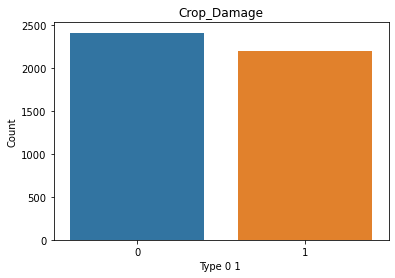

0    2407
1    2192
Name: Soil_Type, dtype: int64


In [125]:
plt.subplots(figsize=(6,4))
sns.countplot(x="Soil_Type",data=d)
plt.title("Crop_Damage")
plt.xlabel("Type 0 1 ")
plt.ylabel("Count")
plt.show()
print(df.Soil_Type.value_counts())

Observation: 
0 soil type -2407
1 soil type -2192

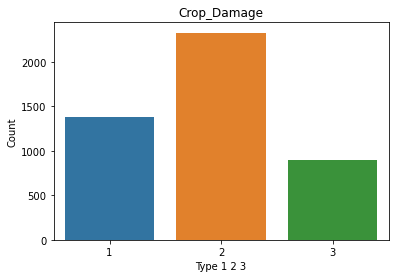

2    2205
1    1307
3     858
Name: Season, dtype: int64


In [136]:
plt.subplots(figsize=(6,4))
sns.countplot(x="Season",data=d)
plt.title("Crop_Damage")
plt.xlabel("Type 1 2 3")
plt.ylabel("Count")
plt.show()
print(df_new.Season.value_counts())

Observation: 
1 season-1365
2 season -2296
3 season -887

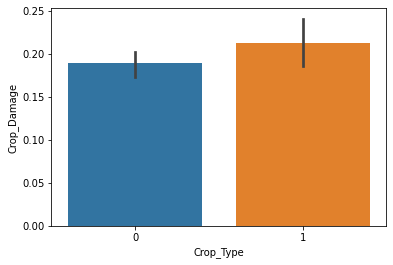

In [138]:
sns.barplot(x="Crop_Type",y="Crop_Damage",data=d)

Observation: Crop type 1 causes more damage when compared to crop type 0

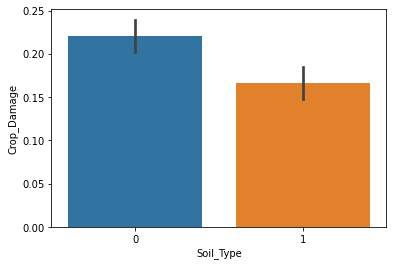

In [139]:
sns.barplot(x="Soil_Type",y="Crop_Damage",data=d)

Observation: Soil type 0 causes more damage than soil type 1

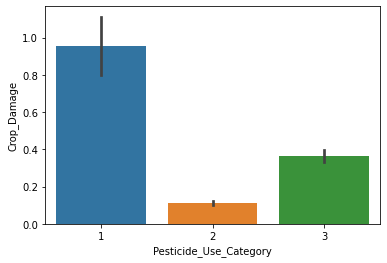

In [133]:
sns.barplot(x="Pesticide_Use_Category",y="Crop_Damage",data=d)

Observation:Pesticide type 1 causes more damage when compared to pesticides type 2 and 3

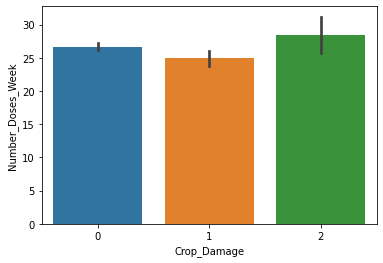

In [140]:
sns.barplot(x="Crop_Damage",y="Number_Doses_Week",data=d)

In [ ]:
Observation:Number Doses Week is high, Crop damaged by pesticids 2 is high when compared to 0 and 1

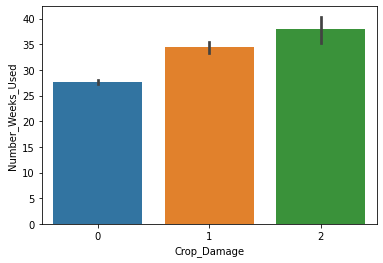

In [144]:
sns.barplot(x="Crop_Damage",y="Number_Weeks_Used",data=d)

In [ ]:
Observation:Number Weeks used is high, Crop damaged by pesticids 2 is high when compared to 0 and 1

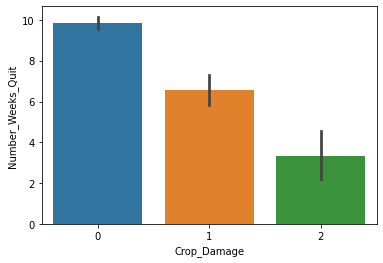

In [146]:
sns.barplot(x="Crop_Damage",y="Number_Weeks_Quit",data=d)

Observation:Number Weeks quit used is high, higher value for alive crop when compared to 1 and 2(damaged crop)

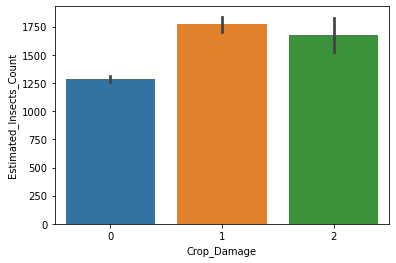

In [130]:
sns.barplot(x="Crop_Damage",y="Estimated_Insects_Count",data=d)

Observation:Less Value of insect count more alive(0) and more damage due to other cause when insect count is high

In [147]:
df_x=df_new.drop(columns=['Crop_Damage'])
y=pd.DataFrame(df_new['Crop_Damage'])
x=pd.DataFrame(df_x)

In [148]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [150]:
print(x_train.shape, '\t', x_test.shape)
print(y_train.shape, '\t', y_test.shape)

(3059, 8) 	 (1311, 8)
(3059, 1) 	 (1311, 1)


In [151]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
for m in model:
    m.fit(x_train,y_train)
    print('score',m,"is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score",accuracy_score(y_test,predm))
    print("confusion matrix",confusion_matrix(y_test,predm))
    print("classification report",classification_report(y_test,predm))
    print("*********************************************")
    print("\n")

score DecisionTreeClassifier() is 0.9990192873488069
accuracy score 0.7734553775743707
confusion matrix [[950 180]
 [117  64]]
classification report               precision    recall  f1-score   support

           0       0.89      0.84      0.86      1130
           1       0.26      0.35      0.30       181

    accuracy                           0.77      1311
   macro avg       0.58      0.60      0.58      1311
weighted avg       0.80      0.77      0.79      1311

*********************************************


score KNeighborsClassifier() is 0.8780647270349787
accuracy score 0.8520213577421816
confusion matrix [[1072   58]
 [ 136   45]]
classification report               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1130
           1       0.44      0.25      0.32       181

    accuracy                           0.85      1311
   macro avg       0.66      0.60      0.62      1311
weighted avg       0.83      0.85      0.83      1311

Observation:
    DTC:100
    KNN:87.8
    SVC:86.1
    Gaussian:83.5

Best method=KNN

In [152]:
#using as best model
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("score",knn.score(x_train,y_train))
predm=knn.predict(x_test)
print("accuracy score",accuracy_score(y_test,predm))
print("confusion matrix",confusion_matrix(y_test,predm))
print("classification report",classification_report(y_test,predm))

score 0.8780647270349787
accuracy score 0.8520213577421816
confusion matrix [[1072   58]
 [ 136   45]]
classification report               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1130
           1       0.44      0.25      0.32       181

    accuracy                           0.85      1311
   macro avg       0.66      0.60      0.62      1311
weighted avg       0.83      0.85      0.83      1311



In [153]:
#GridsearchCV 
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':range(22,25)}
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 22}

In [154]:
#using KNN as best model
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("score",knn.score(x_train,y_train))
predm=knn.predict(x_test)
print("accuracy score",accuracy_score(y_test,predm))
print("confusion matrix",confusion_matrix(y_test,predm))
print("classification report",classification_report(y_test,predm))

score 0.8780647270349787
accuracy score 0.8520213577421816
confusion matrix [[1072   58]
 [ 136   45]]
classification report               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1130
           1       0.44      0.25      0.32       181

    accuracy                           0.85      1311
   macro avg       0.66      0.60      0.62      1311
weighted avg       0.83      0.85      0.83      1311



In [155]:
#Cross validation
from sklearn.model_selection import cross_val_score
knnscores=cross_val_score(knn,x,y,cv=4)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.80695334 0.84354986 0.7985348  0.84432234]
0.8233400862632336 0.020811763442869453


In [156]:
#Ensemble technique-RFC
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=5,random_state=60)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(rf.score(x_train,y_train))
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9741745668519124
0.8375286041189931
[[1042   88]
 [ 125   56]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1130
           1       0.39      0.31      0.34       181

    accuracy                           0.84      1311
   macro avg       0.64      0.62      0.63      1311
weighted avg       0.82      0.84      0.83      1311



In [157]:
#Ensemble technique-ABC
from sklearn.ensemble import AdaBoostClassifier
svc=SVC()
ab=AdaBoostClassifier(n_estimators=20,learning_rate=0.1,random_state=42,algorithm='SAMME')
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(ab.score(x_train,y_train))
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.8502778685845047
0.8619374523264683
[[1130    0]
 [ 181    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1130
           1       0.00      0.00      0.00       181

    accuracy                           0.86      1311
   macro avg       0.43      0.50      0.46      1311
weighted avg       0.74      0.86      0.80      1311



In [158]:
#Ensemble technique-GBC
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb=GradientBoostingClassifier(n_estimators=20,learning_rate=0.1,random_state=42)
gb.fit(x_train,y_train)
predgb=ab.predict(x_test)
print(gb.score(x_train,y_train))
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8600849950964368
0.8619374523264683
[[1130    0]
 [ 181    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1130
           1       0.00      0.00      0.00       181

    accuracy                           0.86      1311
   macro avg       0.43      0.50      0.46      1311
weighted avg       0.74      0.86      0.80      1311



In [ ]:
Observation:
RFC-97.1
ADC-85.2
GBC-85.3
Best boosting technique-RFC

# TEST DATA

In [169]:
df2=pd.read_csv('testagri.csv')
df2

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


True


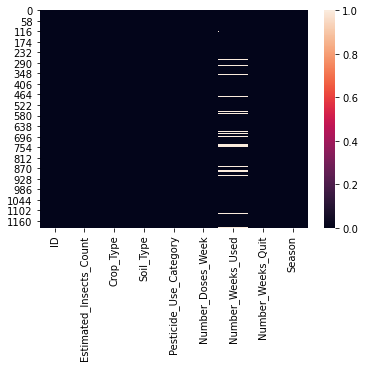

In [170]:
#Check null value
print(df2.isnull().values.any())
sns.heatmap(df2.isnull())

In [171]:
df2.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [172]:
imp1=SimpleImputer(strategy="mean")
df2['Number_Weeks_Used']=imp1.fit_transform(df2['Number_Weeks_Used'].values.reshape(-1,1))

False


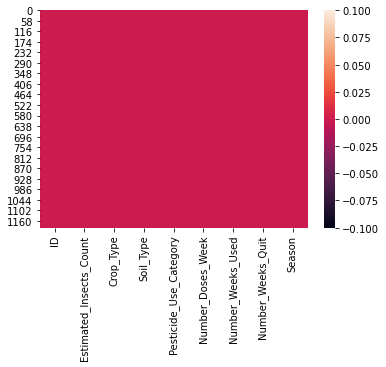

In [100]:
print(df2.isnull().values.any())
sns.heatmap(df2.isnull())

In [173]:
#Check skew
df2.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [ ]:
df2=df2.drop(["ID"],axis=1)

In [183]:
#Check Outlier
from scipy.stats import zscore
z=np.abs(zscore(df2))
threshold=3
print(np.where(z>3))
df_new=df2[(z<3).all(axis=1)]
df_new

(array([  50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
        503,  535,  574,  613,  630,  751,  775,  827,  829,  853,  868,
        870,  871,  883,  890,  895,  897,  902,  904,  910,  911,  912,
        913,  914,  915,  916, 1030, 1152], dtype=int64), array([4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 4, 4], dtype=int64))


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,29.033333,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.000000,7,3
1195,1132,0,1,2,40,25.000000,3,1
1196,1132,0,1,2,20,13.000000,23,1
1197,1212,0,1,2,10,35.000000,5,1


In [184]:
print(df2.shape) #dataset
print(df_new1.shape) #Removed Outliers

(1199, 8)
(1160, 8)


In [185]:
knn.predict(df_new1)

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [186]:
df=pd.DataFrame(predm)
df.to_csv('Agriculture prediction.csv')